In [19]:
import time
import numpy as np

In [34]:
def blue_repump(on: bool):
    if on:
        flip_mirror_switch_ni.set_state(state="On", switch="Mirror")
    else:
        flip_mirror_switch_ni.set_state(state="Off", switch="Mirror")

In [35]:
blue_repump(True)
time.sleep(1)
blue_repump(False)

In [31]:
timetaggerlogic.counter.getDataNormalized()[0].mean()

583.7

In [104]:
blue_repump(True)

In [30]:
ple_gui._mw.ple_widget.target_point.setValue(8581)

In [83]:
w1 = high_finesse_wavemeter.get_current_wavelength()

In [84]:
w2 = high_finesse_wavemeter.get_current_wavelength()

In [85]:
(w2 - w1)*1e6

-903.8413916755417

In [89]:
n1 = timetaggerlogic.counter.getDataNormalized()[0]

In [107]:
500e5 * 1e6 / 1e12

50.0

In [172]:
nuclear_ = tagger.counter(channels=[1], bin_width=1e9, n_values=1e6)

In [154]:
clicks = nuclear_.getData()

In [125]:
clicks

array([[0, 0, 0, ..., 0, 0, 0]])

In [155]:
click_idx = np.where([np.array(clicks) > 0])

In [158]:
cl1 = click_idx[-1]

In [161]:
cl2 = np.roll(click_idx[-1], -1)

In [165]:
y,x = np.histogram((cl2-cl1)[:-1], bins=100, )

In [168]:
from matplotlib import pyplot as plt

In [171]:
y

array([10749,  5334,  4077,  3319,  2707,  2390,  2049,  1703,  1424,
        1270,  1126,   960,   891,   747,   643,   532,   493,   447,
         376,   297,   316,   272,   224,   190,   189,   134,   136,
         131,    99,    99,    91,    82,    75,    42,    40,    55,
          39,    42,    29,    22,    16,    19,    19,    14,    14,
          23,     6,     8,    11,     6,     6,     5,     4,     8,
           1,     3,     6,     5,     2,     0,     2,     1,     2,
           0,     2,     0,     3,     2,     1,     0,     0,     0,
           0,     0,     0,     1,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           1], dtype=int64)

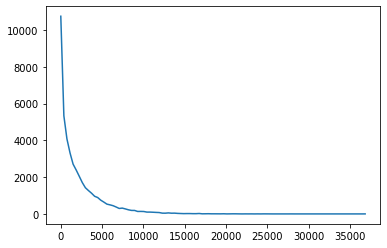

In [170]:
plt.plot(x[:-1], y)

(array([49.,  5.,  3.,  3.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([1.000000e+00, 3.728300e+02, 7.446600e+02, 1.116490e+03,
       1.488320e+03, 1.860150e+03, 2.231980e+03, 2.603810e+03,
       2.975640e+03, 3.347470e+03, 3.719300e+03, 4.091130e+03,
       4.462960e+03, 4.834790e+03, 5.206620e+03, 5.578450e+03,
       5.950280e+03, 6.322110e+03, 6.693940e+03, 7.065770e+03,
       7.437600e+03, 7.809430e+03, 8.181260e+03, 8.553090e+03,
       8.924920e+03, 9.296750e+03, 9.668580e+03, 1.004041e+04,


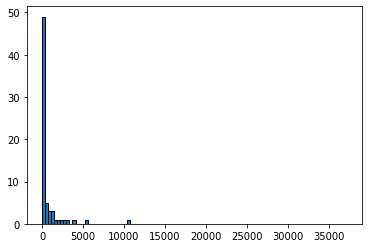

In [169]:
plt.hist(y, bins=x, edgecolor='black')

In [106]:
clicks[0][click_idx[-1]]

array([2, 1, 1, ..., 1, 1, 1])

In [100]:
click_idx = np.where([np.array(clicks) > 0])

In [101]:
click_idx

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([438270203, 438271560, 438278509, ..., 499990579, 499997485,
       499999822], dtype=int64))

In [11]:
high_finesse_wavemeter._wavemeter.get_regulation_mode()

True

In [2]:
high_finesse_wavemeter._wavemeter.set_regulation_mode(mode = True)

0

In [2]:
high_finesse_wavemeter._wavemeter.set_deviation_signal(2000, channel=2)

0

In [6]:
high_finesse_wavemeter._wavemeter.start_measurements()

In [15]:
center = high_finesse_wavemeter._wavemeter.get_wavelength(channel=4)
high_finesse_wavemeter._wavemeter.set_reference_course(str(center), channel=2)

In [14]:
high_finesse_wavemeter._wavemeter.set_regulation_mode(True)

0

In [20]:
def refocus_ple(range_ = 200, steps = 60, integrate=0.1):
    #Range in MHz
    range_ = range_ * 1e-6
    center = float(high_finesse_wavemeter._wavemeter.get_reference_course(channel=2).decode("utf-8"))
    counts = []

    for step in range(0, steps):
        high_finesse_wavemeter._wavemeter.set_reference_course(f"{center - range_/2 + step * range_/steps}", channel=2)
        time.sleep(integrate)
        
        counts.append(timetaggerlogic.counter.getDataNormalized()[0].mean())
    time.sleep(integrate)
    high_finesse_wavemeter._wavemeter.set_reference_course(f"{center - range_/2 + counts.index(max(counts)) * range_/steps}", channel=2)
    print(counts.index(max(counts)))
    return counts

def detune_ple(detune):
    detune = detune * 1e-6
    center = float(high_finesse_wavemeter._wavemeter.get_reference_course(channel=2).decode("utf-8"))
    high_finesse_wavemeter._wavemeter.set_reference_course(f"{center - detune}", channel=2)

In [40]:
cts = refocus_ple(range_ = 350, steps = 15, integrate=1)

7


In [41]:
blue_repump(True)


In [24]:
detune_ple(-5)

In [29]:
timetaggerlogic.counter.getDataNormalized()[0].mean()

448.2

In [26]:
cts

[387.9, 379.7, 376.3, 376.6, 375.9, 375.6, 374.3, 373.5, 371.6, 366.8, 360.9, 357.8, 352.8, 345.9, 337.4, 330.4, 328.1, 328.6, 333.1, 333.5, 331.4, 333.0, 334.4, 329.8, 329.4, 327.7, 324.7, 326.2, 326.3, 326.5]